<a href="https://colab.research.google.com/github/zain-0/World-Cup-Analysis/blob/main/WorldCup_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))




Saving CWC23_all_innings.csv to CWC23_all_innings.csv
User uploaded file "CWC23_all_innings.csv" with length 139670 bytes


In [3]:
df=pd.read_csv("/content/CWC23_all_innings.csv")

Team-wise Performance Metrics:
  team  runs  wkts  bb_bf      econ          sr
0  AFG  4134  53.0   4795  5.763818   77.648378
1  AUS  5234  77.0   5482  5.661129   85.571290
2  BAN  4358  51.0   4849  6.095769   73.812022
3  ENG  4396  65.0   4620  6.068302   89.407551
4  IND  4783  94.0   5191  4.963793  100.259545
5  NED  4268  63.0   4802  6.170339   67.748061
6   NZ  5376  71.0   5320  6.237143   97.041605
7  PAK  4786  65.0   4787  6.286923   85.479342
8   SA  5097  88.0   5348  5.682778   98.443218
9   SL  4366  50.0   4516  6.606111   66.799048


<ipython-input-4-ab964f0fd9d6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='runs', data=team_performance, palette='viridis')


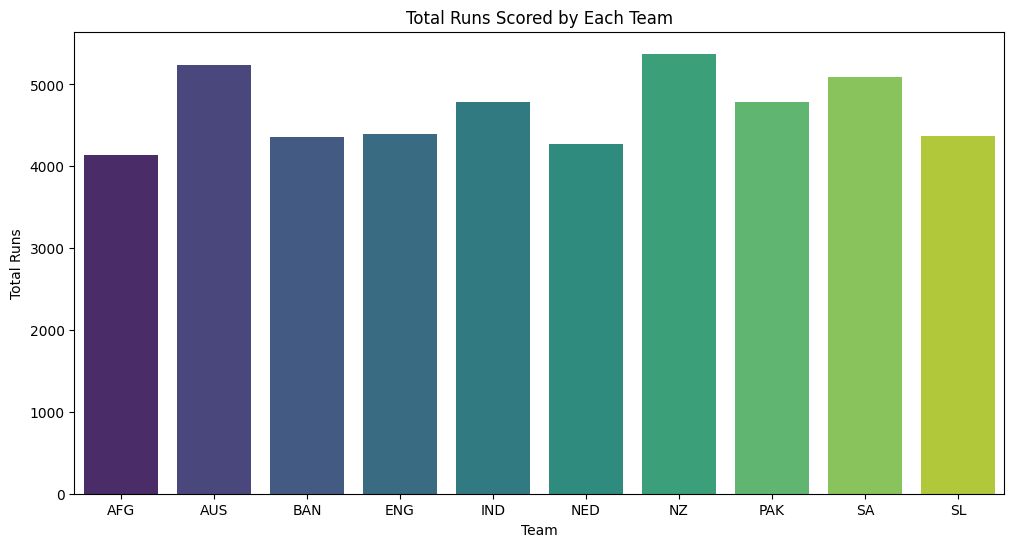

<ipython-input-4-ab964f0fd9d6>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='wkts', data=team_performance, palette='magma')


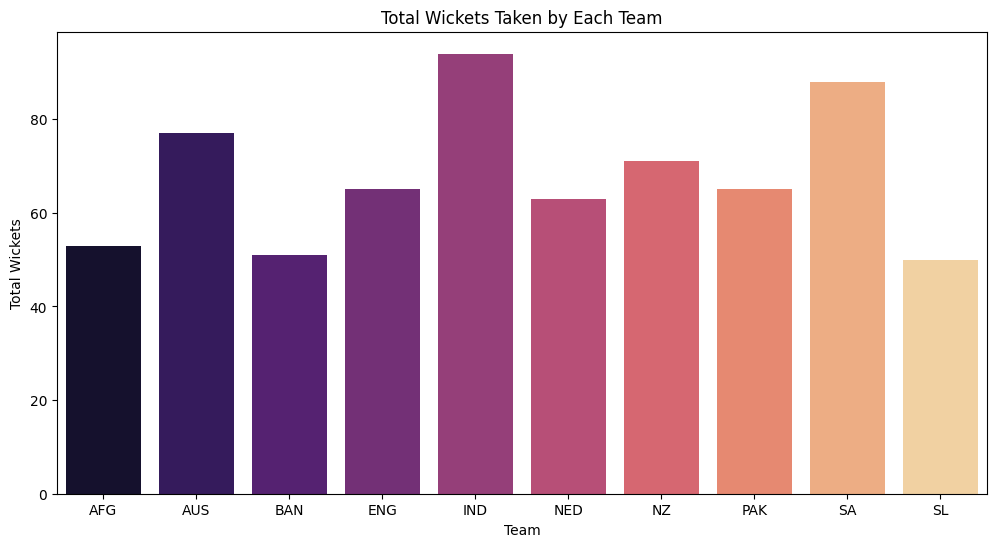

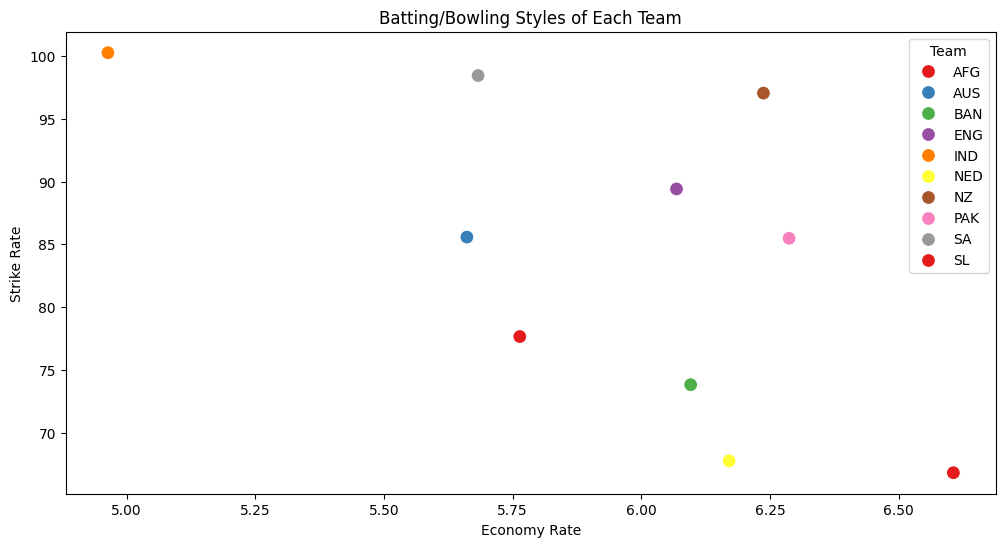


Top Performing Teams based on Runs:
  team  runs
6   NZ  5376
1  AUS  5234
8   SA  5097

Top Performing Teams based on Wickets:
  team  wkts
4  IND  94.0
8   SA  88.0
1  AUS  77.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns



# Explore team-wise performance metrics
team_performance = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'econ': 'mean',
    'sr': 'mean'
}).reset_index()

# Display the team-wise performance metrics
print("Team-wise Performance Metrics:")
print(team_performance)

# Analyze runs scored, wickets taken, and batting/bowling styles
# Using bar plots
plt.figure(figsize=(12, 6))

# Runs Scored
sns.barplot(x='team', y='runs', data=team_performance, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

# Wickets Taken
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='wkts', data=team_performance, palette='magma')
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.show()

# Batting/Bowling Styles
plt.figure(figsize=(12, 6))
sns.scatterplot(x='econ', y='sr', hue='team', data=team_performance, palette='Set1', s=100)
plt.title('Batting/Bowling Styles of Each Team')
plt.xlabel('Economy Rate')
plt.ylabel('Strike Rate')
plt.legend(title='Team')
plt.show()


In [ ]:
# Identify top-performing teams and their strengths
# Top performing (Wickets or Runs)

top_teams_runs = team_performance.nlargest(3, 'runs')
top_teams_wkts = team_performance.nlargest(3, 'wkts')

print("\nTop Performing Teams based on Runs:")
print(top_teams_runs[['team', 'runs']])

print("\nTop Performing Teams based on Wickets:")
print(top_teams_wkts[['team', 'wkts']])


In [5]:
# Player Performance Analysis

# Batting Performance Analysis
batting_performance = df[df['bat_or_bowl'] == 'bat']

# Evaluate individual player statistics for batting
player_batting_stats = batting_performance.groupby('player').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'not_out': 'sum'
}).reset_index()

# Identify leading run-scorers
top_run_scorers = player_batting_stats.nlargest(3, 'runs')

print("\nLeading Run Scorers:")
print(top_run_scorers[['player', 'runs']])

# Assess the impact of players on their team's performance
player_impact_on_team = player_batting_stats.sort_values('runs', ascending=False)

print("\nPlayer Impact on Team's Performance:")
print(player_impact_on_team[['player', 'runs']])

# Bowling Performance Analysis
bowling_performance = df[df['bat_or_bowl'] == 'bowl']

# Evaluate individual player statistics for bowling
player_bowling_stats = bowling_performance.groupby('player').agg({
    'wkts': 'sum',
    'econ': 'mean',
}).reset_index()

# Identify leading wicket-takers
top_wicket_takers = player_bowling_stats.nlargest(3, 'wkts')

print("\nLeading Wicket Takers:")
print(top_wicket_takers[['player', 'wkts']])

# Assess the impact of players on their team's performance
# You can use total wickets as a measure of impact
player_impact_on_team_bowling = player_bowling_stats.sort_values('wkts', ascending=False)

print("\nPlayer Impact on Team's Bowling Performance:")
print(player_impact_on_team_bowling[['player', 'wkts']])



Leading Run Scorers:
              player  runs
142    V Kohli (IND)   711
104   Q de Kock (SA)   594
106  R Ravindra (NZ)   578

Player Impact on Team's Performance:
                     player  runs
142           V Kohli (IND)   711
104          Q de Kock (SA)   594
106         R Ravindra (NZ)   578
26         DJ Mitchell (NZ)   552
109         RG Sharma (IND)   550
..                      ...   ...
74       MADI Hemantha (SL)     4
33   Fazalhaq Farooqi (AFG)     2
119           SA Yadav(IND)     1
6            AT Carey (AUS)     0
141         Usama Mir (PAK)     0

[146 rows x 2 columns]

Leading Wicket Takers:
                  player  wkts
62  Mohammed Shami (IND)  23.0
1          A Zampa (AUS)  22.0
16     D Madushanka (SL)  21.0

Player Impact on Team's Bowling Performance:
                    player  wkts
62    Mohammed Shami (IND)  23.0
1            A Zampa (AUS)  22.0
16       D Madushanka (SL)  21.0
22          G Coetzee (SA)  20.0
33         JJ Bumrah (IND)  18.0
..      

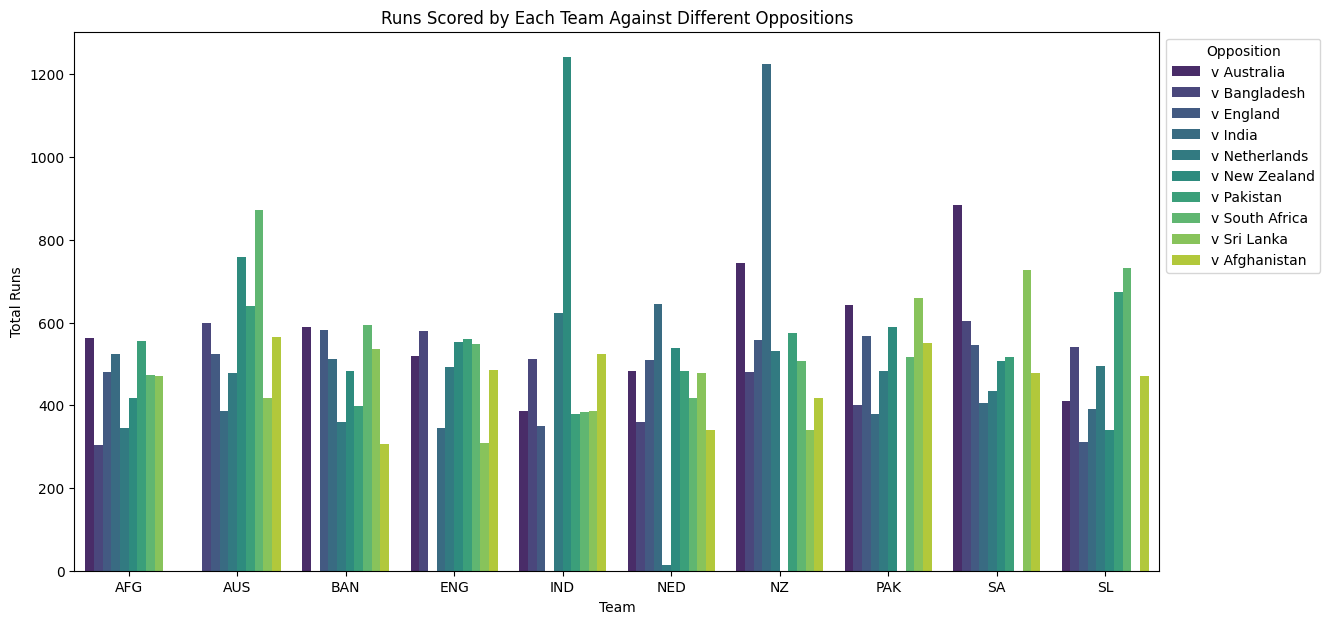

<ipython-input-6-477f2b634c75>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ground', y='runs', data=ground_performance, palette='magma')


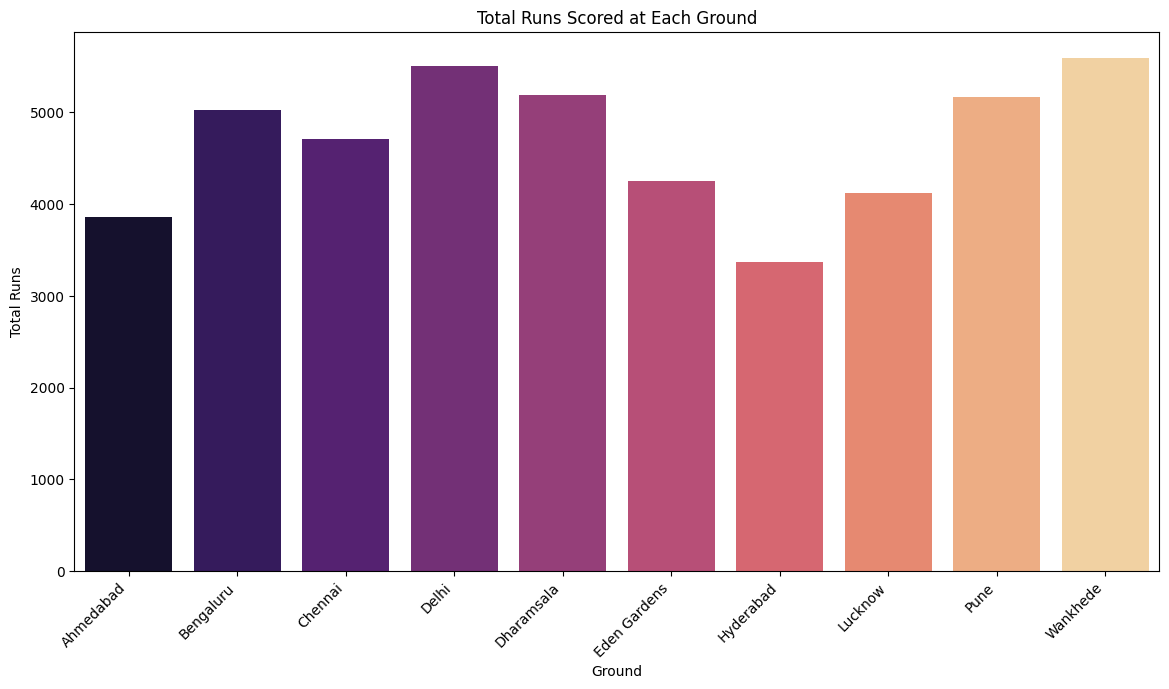


Teams Excelling Against Specific Oppositions:
   team      opposition  runs
0   AFG     v Australia   563
16  AUS  v South Africa   871
25  BAN  v South Africa   595
29  ENG    v Bangladesh   580
41  IND   v New Zealand  1241
49  NED         v India   646
59   NZ         v India  1224
72  PAK     v Sri Lanka   659
74   SA     v Australia   884
90   SL  v South Africa   733

Players Excelling at Specific Grounds:
                    player        ground  runs
4             A Dutt (NED)     Hyderabad   122
13           A Zampa (AUS)       Lucknow   128
18      AAP Atkinson (ENG)      Wankhede    95
19         AD Mathews (SL)     Bengaluru    59
24         AK Markram (SA)       Chennai   111
..                     ...           ...   ...
790        Usama Mir (PAK)       Chennai   100
800          V Kohli (IND)      Wankhede   205
804  Vikramjit Singh (NED)     Hyderabad    89
807        W Barresi (NED)  Eden Gardens    41
813          WA Young (NZ)     Hyderabad    70

[152 rows x 3 colu

In [6]:


# Opposition Analysis
team_opposition_performance = df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# How teams perform against different oppositions
plt.figure(figsize=(14, 7))
sns.barplot(x='team', y='runs', hue='opposition', data=team_opposition_performance, palette='viridis')
plt.title('Runs Scored by Each Team Against Different Oppositions')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.legend(title='Opposition', bbox_to_anchor=(1, 1))
plt.show()

# Performance variations across different playing grounds
ground_performance = df.groupby('ground').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='ground', y='runs', data=ground_performance, palette='magma')
plt.title('Total Runs Scored at Each Ground')
plt.xlabel('Ground')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.show()

# The specific teams that excel against certain oppositions
team_opposition_max_runs = team_opposition_performance.loc[team_opposition_performance.groupby('team')['runs'].idxmax()]

print("\nTeams Excelling Against Specific Oppositions:")
print(team_opposition_max_runs[['team', 'opposition', 'runs']])

# The specific players that excel at certain grounds
player_ground_performance = df.groupby(['player', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

player_ground_max_runs = player_ground_performance.loc[player_ground_performance.groupby('player')['runs'].idxmax()]

print("\nPlayers Excelling at Specific Grounds:")
print(player_ground_max_runs[['player', 'ground', 'runs']])


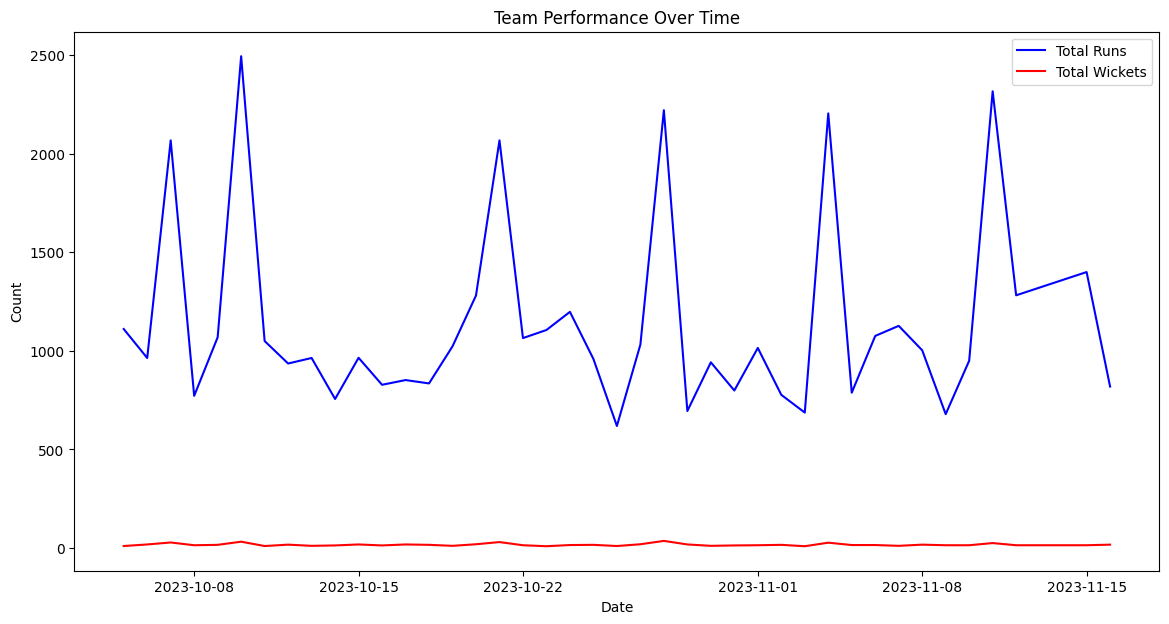

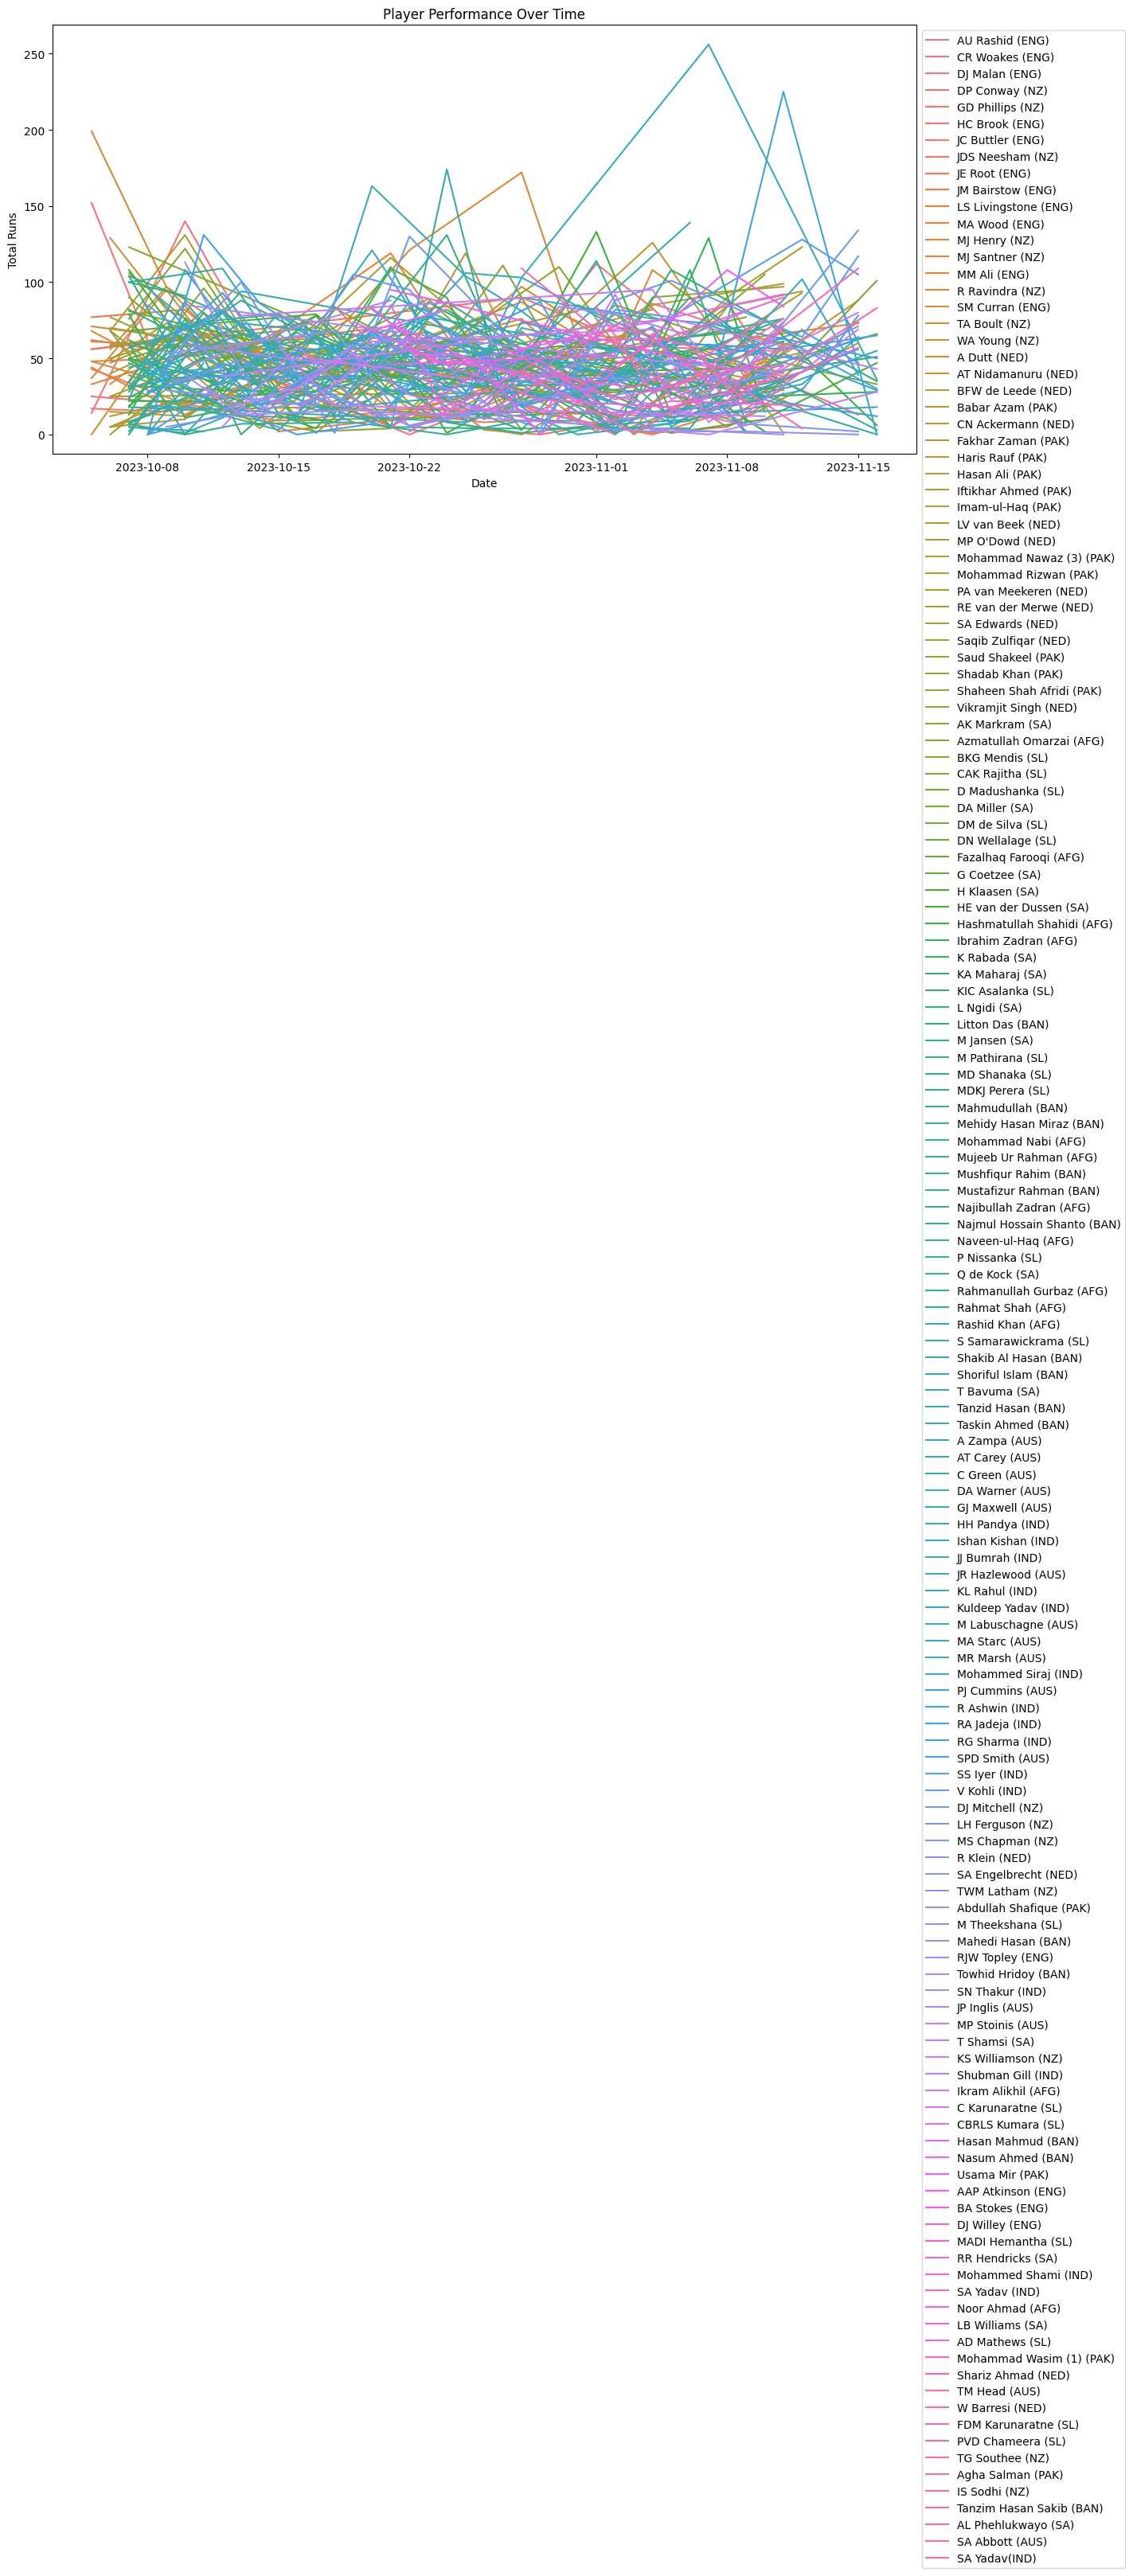

In [7]:
#Temporal Analysis

# Convert 'start_date' to datetime format so its easier to compute that way
df['start_date'] = pd.to_datetime(df['start_date'])

# Study performance trends over time
temporal_team_performance = df.groupby('start_date').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Temporal patterns or changes in team performance
plt.figure(figsize=(14, 7))
sns.lineplot(x='start_date', y='runs', data=temporal_team_performance, label='Total Runs', color='blue')
sns.lineplot(x='start_date', y='wkts', data=temporal_team_performance, label='Total Wickets', color='red')
plt.title('Team Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Study performance trends over time for players
temporal_player_performance = df.groupby(['start_date', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

# Temporal patterns or changes in player performance
plt.figure(figsize=(14, 7))
sns.lineplot(x='start_date', y='runs', hue='player', data=temporal_player_performance)
plt.title('Player Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
